#Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

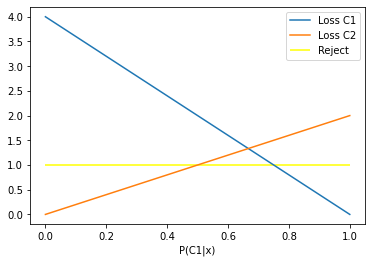

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,0],[0,4],label='Loss C1')
plt.plot([0,1],[0,2],label='Loss C2')
plt.hlines(1,xmin=0,xmax=1,color='yellow',label='Reject')
plt.xlabel("P(C1|x)")
plt.legend()

## Answer: Decision Rules for C1,C2 and reject are

C2    : 0    < P(C1|x) < 0.5

Reject: 0.5  < P(C1|x) < 0.75

C1    : 0.75 < P(C1|x) < 1

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

## Answer:

# 2 a)

In [2]:
import numpy as np

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_train = lr.predict(X_train)
predict_test = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_train, predict_train))
print(classification_report(y_test, predict_test))


              precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

              precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



C:\Users\17372\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\17372\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\17372\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\17372\anaconda3\lib\site-packages\sklearn\metr

# 2 b)

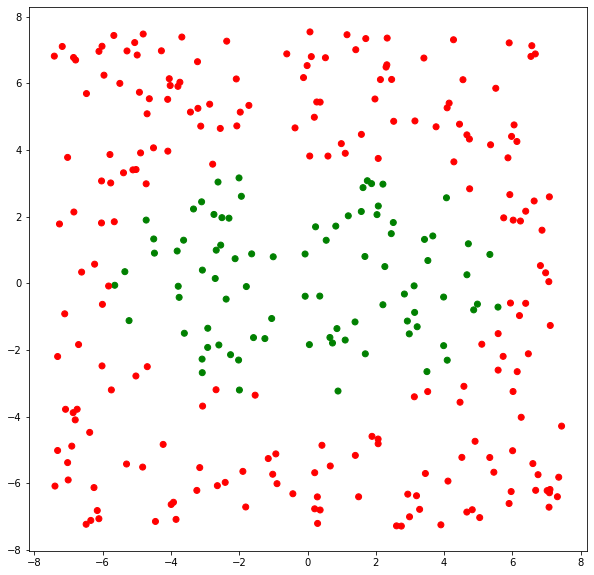

In [4]:
import matplotlib as matplt
colors = ['red','green']

fig = plt.figure(figsize=(10,10))
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=matplt.colors.ListedColormap(colors))
plt.show()


From the above graph, we can see the classes are not in a linearly separable form. Hence, the logistic regression classifier does not work in this one

# 2 c)

              precision    recall  f1-score   support

       False       0.94      0.96      0.95       214
        True       0.89      0.85      0.87        86

    accuracy                           0.93       300
   macro avg       0.92      0.90      0.91       300
weighted avg       0.93      0.93      0.93       300

              precision    recall  f1-score   support

       False       0.96      0.96      0.96        69
        True       0.90      0.90      0.90        31

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



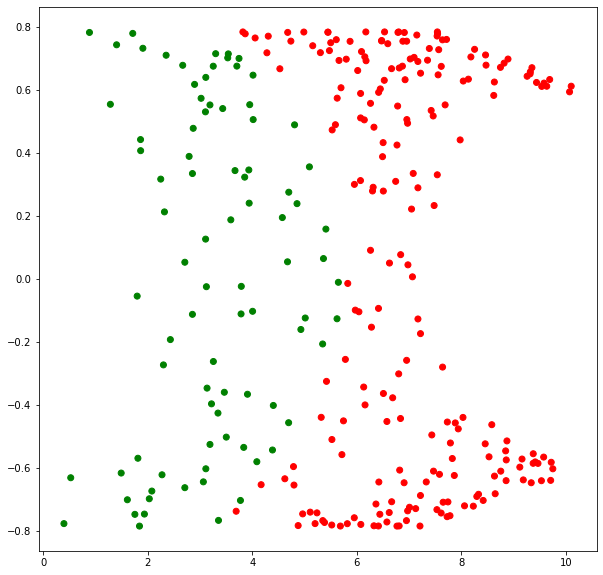

In [5]:
X_trans_train=X_train
X_trans_train[:,0] = np.sqrt(X_train[:,0]**2 + X_train[:,1]**2)
X_trans_train[:,1]= np.arctan2(X_train[:,1], X_train[:,0])
colors = ['red','green']
X_trans_test=X_test
X_trans_test[:,0] = np.sqrt(X_test[:,0]**2 + X_test[:,1]**2)
X_trans_test[:,1]= np.arctan2(X_test[:,1], X_test[:,0])

lr = LogisticRegression()
lr.fit(X_trans_train, y_train)
predict_train = lr.predict(X_trans_train)
predict_test = lr.predict(X_trans_test)

from sklearn.metrics import classification_report
print(classification_report(y_train, predict_train))
print(classification_report(y_test, predict_test))
fig = plt.figure(figsize=(10,10))
plt.scatter(X_trans_train[:,0],X_trans_train[:,1], c=y_train, cmap=matplt.colors.ListedColormap(colors))
plt.show()


# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [1]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:
P(A,B,C,D,E)= P(A) * P(B/A) * P(D/B) * P(E/B)* P(C/A,E) * P(F/C,D,E) <br>

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: 



In [7]:
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
#rfc_pipeline_b = Pipeline(steps = [('data_scaling', StandardScaler()),
#    ('model', RandomForestClassifier(max_depth = 4,min_samples_split = 4,n_estimators = 50))])
    
rfc_pipeline_b = Pipeline(steps = [('model', RandomForestClassifier(max_depth = 4,min_samples_split = 4,n_estimators = 50))])

rfc_b=rfc_pipeline_b.fit(X_train_b, y_train_b)

rfc_pipeline_preds_b = rfc_pipeline_b.predict(X_test_b)
rfc_pipeline_preds_b_train = rfc_pipeline_b.predict(X_train_b)
rfc_val_accuracy_b_train = accuracy_score(y_train_b, rfc_pipeline_preds_b_train)
print("Random forest")
print(f'Training Accuracy Score: {rfc_val_accuracy_b_train}')

rfc_val_accuracy_b = accuracy_score(y_test_b, rfc_pipeline_preds_b)
print(f'Test Accuracy Score: {rfc_val_accuracy_b}')

Random forest
Training Accuracy Score: 0.989501312335958
Test Accuracy Score: 0.9521276595744681


In [9]:
#lr_pipeline_b = Pipeline(steps = [('data_scaling', StandardScaler()),('model', LogisticRegression(C=0.1))])
lr_pipeline_b = Pipeline(steps = [('model', LogisticRegression(C=0.1))])
lr_b=lr_pipeline_b.fit(X_train_b, y_train_b)
lr_pipeline_preds_b = lr_pipeline_b.predict(X_test_b)
lr_pipeline_preds_b_train = lr_pipeline_b.predict(X_train_b)
lr_val_accuracy_b_train = accuracy_score(y_train_b, lr_pipeline_preds_b_train)
print("Logistic Regression")
print(f'Training Accuracy Score: {lr_val_accuracy_b_train}')

lr_val_accuracy_b = accuracy_score(y_test_b, lr_pipeline_preds_b)
print(f'Test Accuracy Score: {lr_val_accuracy_b}')

Logistic Regression
Training Accuracy Score: 0.9343832020997376
Test Accuracy Score: 0.9574468085106383


C:\Users\17372\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
numhiddenunits=[x for x in range(20,101)]
best_acc=0
best_nhu=0
for nhu in numhiddenunits:
    mlp_pipeline_b = Pipeline(steps = [('data_scaling', StandardScaler()),('model', MLPClassifier(hidden_layer_sizes=(nhu)))])
    mlp_pipeline_b.fit(X_train_b, y_train_b)
    mlp_pipeline_preds_b = mlp_pipeline_b.predict(X_test_b)
    mlp_val_accuracy_b = accuracy_score(y_test_b, mlp_pipeline_preds_b)
    if mlp_val_accuracy_b>best_acc:
        best_acc=mlp_val_accuracy_b
        best_nhu=nhu      
    
#print(f'Accuracy Score: {best_acc}')
#mlp_pipeline_b = Pipeline(steps = [('data_scaling', StandardScaler()),('model', MLPClassifier(hidden_layer_sizes=(best_nhu)))])
mlp_pipeline_b = Pipeline(steps = [('model', MLPClassifier(hidden_layer_sizes=(best_nhu)))])
mlp_b=mlp_pipeline_b.fit(X_train_b, y_train_b)
mlp_pipeline_preds_b_train =mlp_pipeline_b.predict(X_train_b)
mlp_val_accuracy_b_train = accuracy_score(y_train_b, mlp_pipeline_preds_b_train)
print("MLP")
print(f'Training Accuracy Score: {mlp_val_accuracy_b_train}')
mlp_pipeline_preds_b = mlp_pipeline_b.predict(X_test_b)
mlp_val_accuracy_b = accuracy_score(y_test_b, mlp_pipeline_preds_b)
print(f'Test Accuracy Score: {mlp_val_accuracy_b}')


MLP
Training Accuracy Score: 0.926509186351706
Test Accuracy Score: 0.9521276595744681


In [11]:
import numpy as np
# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
#rfc_pipeline_a = Pipeline(steps = [('data_scaling', StandardScaler()),
 #   ('model', RandomForestClassifier(max_depth = 4,min_samples_split = 4,n_estimators = 50))])

rfc_pipeline_a = Pipeline(steps = [('model', RandomForestClassifier(max_depth = 15,min_samples_split = 10,n_estimators = 50))])
rfc_a=rfc_pipeline_a.fit(X_train_a, y_train_a)
rfc_pipeline_preds_a = rfc_pipeline_a.predict(X_test_a)
rfc_pipeline_preds_a_train =rfc_pipeline_a.predict(X_train_a)
rfc_val_accuracy_a_train = accuracy_score(y_train_a, rfc_pipeline_preds_a_train)
print("Random Forest")
print(f'Training Accuracy Score: {rfc_val_accuracy_a_train}')
rfc_val_accuracy_a = accuracy_score(y_test_a, rfc_pipeline_preds_a)
print(f' Test Accuracy Score: {rfc_val_accuracy_a}')

Random Forest
Training Accuracy Score: 0.8849415539766216
 Test Accuracy Score: 0.8619021031081333


In [13]:
#lr_pipeline_a = Pipeline(steps = [('data_scaling', StandardScaler()),('model', LogisticRegression(C=0.1))])
lr_pipeline_a = Pipeline(steps = [('model', LogisticRegression(C=10))])
lr_a=lr_pipeline_a.fit(X_train_a, y_train_a)
lr_pipeline_preds_a = lr_pipeline_a.predict(X_test_a)
lr_pipeline_preds_a_train =lr_pipeline_a.predict(X_train_a)
lr_val_accuracy_a_train = accuracy_score(y_train_a, lr_pipeline_preds_a_train)
print("Logistic Regression")
print(f'Training Accuracy Score: {lr_val_accuracy_a_train}')
lr_val_accuracy_a = accuracy_score(y_test_a, lr_pipeline_preds_a)
print(f'Accuracy Score: {lr_val_accuracy_a}')

Logistic Regression
Training Accuracy Score: 0.7923905569562227
Accuracy Score: 0.7952726595942676


In [14]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
numhiddenunits=[x for x in range(50,71)]
best_acc=0
best_nhu=0
for nhu in numhiddenunits:
    mlp_pipeline_a = Pipeline(steps = [('data_scaling', StandardScaler()),('model', MLPClassifier(hidden_layer_sizes=(nhu)))])
    mlp_pipeline_a.fit(X_train_a, y_train_a)
    mlp_pipeline_preds_a = mlp_pipeline_a.predict(X_test_a)
    mlp_val_accuracy_a = accuracy_score(y_test_a, mlp_pipeline_preds_a)
    if mlp_val_accuracy_a>best_acc:
        best_acc=mlp_val_accuracy_a
        best_nhu=nhu    
        
    #print(f'Accuracy Score: {nhu, val_accuracy}')
    
print(f'Accuracy Score: {best_acc}')

Accuracy Score: 0.844034989763633


In [15]:
#mlp_pipeline_a = Pipeline(steps = [('data_scaling', StandardScaler()),('model', MLPClassifier(hidden_layer_sizes=(55)))])
mlp_pipeline_a = Pipeline(steps = [('model', MLPClassifier(hidden_layer_sizes=(55)))])
mlp_a=mlp_pipeline_a.fit(X_train_a, y_train_a)
mlp_pipeline_preds_a = mlp_pipeline_a.predict(X_test_a)
mlp_pipeline_preds_a_train =mlp_pipeline_a.predict(X_train_a)
mlp_val_accuracy_a_train = accuracy_score(y_train_a, mlp_pipeline_preds_a_train)
print("MLP")
print(f'Training Accuracy Score: {mlp_val_accuracy_a_train}')
mlp_val_accuracy_a = accuracy_score(y_test_a, mlp_pipeline_preds_a)
print(f'Test Accuracy Score: {mlp_val_accuracy_a}')

MLP
Training Accuracy Score: 0.24400641760256703
Test Accuracy Score: 0.2384142936906756



b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

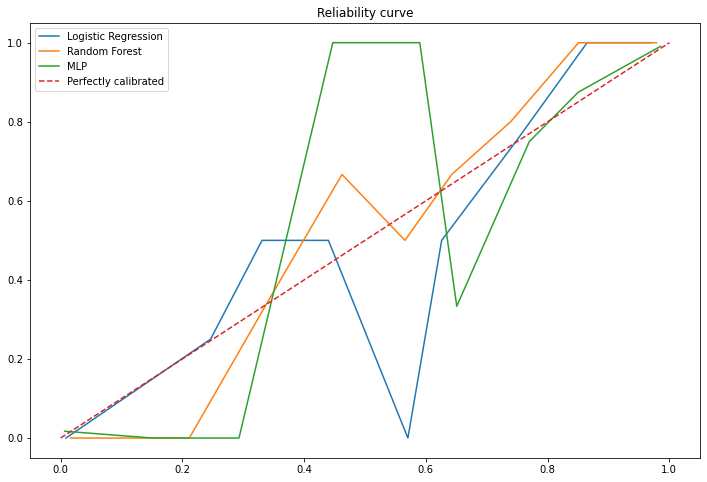

In [16]:
from sklearn.calibration import calibration_curve
fig = plt.figure(figsize=(12,8))


lr_prob_b = lr_pipeline_b.predict_proba(X_test_b)
lr_fraction_of_positives_b, lr_mean_predicted_value_b = calibration_curve(y_test_b, lr_prob_b[:,1], n_bins=10)
plt.plot(lr_mean_predicted_value_b, lr_fraction_of_positives_b, label="Logistic Regression")

rfc_prob_b = rfc_pipeline_b.predict_proba(X_test_b)
rfc_fraction_of_positives_b, rfc_mean_predicted_value_b = calibration_curve(y_test_b, rfc_prob_b[:,1], n_bins=10)
plt.plot(rfc_mean_predicted_value_b, rfc_fraction_of_positives_b, label="Random Forest")

mlp_prob_b = mlp_pipeline_b.predict_proba(X_test_b)
mlp_fraction_of_positives_b, mlp_mean_predicted_value_b = calibration_curve(y_test_b,mlp_prob_b[:,1], n_bins=10)
plt.plot(mlp_mean_predicted_value_b, mlp_fraction_of_positives_b, label="MLP")

probablities = np.arange(0, 1.2, 0.2)
plt.plot(probablities, probablities, "--", label="Perfectly calibrated")

plt.legend()
plt.xlim([-0.05, 1.05])
plt.title("Reliability curve")
plt.show()

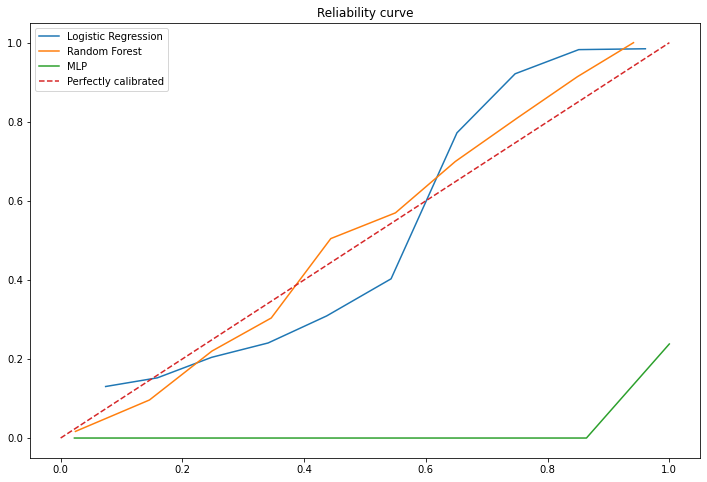

In [17]:
fig = plt.figure(figsize=(12,8))


lr_prob_a = lr_pipeline_a.predict_proba(X_test_a)
lr_fraction_of_positives_a, lr_mean_predicted_value_a = calibration_curve(y_test_a, lr_prob_a[:,1], n_bins=10)
plt.plot(lr_mean_predicted_value_a, lr_fraction_of_positives_a, label="Logistic Regression")

rfc_prob_a = rfc_pipeline_a.predict_proba(X_test_a)
rfc_fraction_of_positives_a, rfc_mean_predicted_value_a = calibration_curve(y_test_a, rfc_prob_a[:,1], n_bins=10)
plt.plot(rfc_mean_predicted_value_a, rfc_fraction_of_positives_a, label="Random Forest")

mlp_prob_a = mlp_pipeline_a.predict_proba(X_test_a)
mlp_fraction_of_positives_a, mlp_mean_predicted_value_a = calibration_curve(y_test_a,mlp_prob_a[:,1], n_bins=10)
plt.plot(mlp_mean_predicted_value_a, mlp_fraction_of_positives_a, label="MLP")

probablities = np.arange(0, 1.2, 0.2)
plt.plot(probablities, probablities, "--", label="Perfectly calibrated")

plt.legend()
plt.xlim([-0.05, 1.05])
plt.title("Reliability curve")
plt.show()

In [18]:
!pip install dice-ml



c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.



In [47]:
import dice_ml
from dice_ml.utils import helpers  # helper functions

df_table_b = pd.DataFrame(index=pd.Index(['Logistic Regression-Random', 'Random Forest-Random', 'MLP-Random','Logistic Regression-Genetic', 'Random Forest-Genetic', 'MLP-Genetic']),
                  columns=pd.Index(['Validity', 'Proximity', 'Sparsity', 'Diversity', 'Indistributionness']))
df_table_a = pd.DataFrame(index=pd.Index(['Logistic Regression-Random', 'Random Forest-Random', 'MLP-Random','Logistic Regression-Genetic', 'Random Forest-Genetic', 'MLP-Genetic']),
                  columns=pd.Index(['Validity', 'Proximity', 'Sparsity', 'Diversity', 'Indistributionness']))


In [48]:

X1=X_train_b.copy()
X1['Target'] = y_train_b
X1.columns.values
d = dice_ml.Data(dataframe=X1, continuous_features=cols, outcome_name='Target')
backend = 'sklearn'
m = dice_ml.Model(model=lr_b, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test_b[0:15]
lr_dice_exp_random_b = exp_random.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [05:30<00:00, 22.02s/it]


In [49]:
lr_cf_b=lr_dice_exp_random_b.cf_examples_list[0].final_cfs_df
lr_cf_b

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,12.47,18.60,81.09,481.9,0.11652,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,222.80,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875,0
1,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06726,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875,0
2,12.47,18.60,81.09,2444.0,0.09965,0.04677,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875,0
3,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,186.40,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875,0
4,12.47,12.55,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875,0


In [50]:
def cf_validity(cf,y1):
    df=cf
    init_num=cf.shape[0]
    if init_num==0:
        return 0    
    df.drop_duplicates(keep='first')
    count=0
    for i in range(len(df)):
        if int(df[i:i+1]['Target']) != int(y1):
            count+=1       
    return count/init_num
    
cf_validity(lr_cf_b,y_test_b[0])

1.0

In [51]:
def cf_proximity(cf,Xtrain,x1):
    df=cf
    total_dist=0
    #each counter factual
    for i in range(len(df)):
        #for each feature
        sample_dist=0
        for j in range(Xtrain.shape[1]):
            MAD=np.median(abs(Xtrain.iloc[:,j]-np.median(Xtrain.iloc[:,j])))
            if MAD==0:
                    MAD=1
            sample_dist+=abs(cf.iloc[i,j]-x1.iloc[0,j])/MAD
            
        
        sample_dist/= Xtrain.shape[1]
        total_dist+=sample_dist
    total_dist/=len(df)
    return -1*total_dist
     
cf_proximity(lr_cf_b,X_train_b,X_test_b[0:1])

-0.5198947625809385

In [52]:
def cf_proximity_test(cf,Xtrain,x1):
    df=cf
    total_dist=0
    #each counter factual
    MAD=[]
    for a in range(3):
        MAD.append(np.median(abs(Xtrain.iloc[:,a]--np.median(Xtrain.iloc[:,a]))))
    for i in range(len(df)):
        #for each feature
        sample_dist=0
        for j in range(3):
            #MAD=np.median(abs(Xtrain.iloc[:,j]-np.median(Xtrain.iloc[:,j])))
            
            sample_dist+=abs(cf.iloc[i,j]-x1.iloc[0,j])/MAD[j]
            
        
        sample_dist/= 3
        total_dist+=sample_dist
    total_dist/=len(df)
    return -1*total_dist

In [53]:
def cf_sparsity(cf,x1):
    df=cf
    total_count=0
    count=0
    #each counter factual
    for i in range(len(df)):
        #for each feature in each counterfactual
        for j in range(x1.shape[1]):
            total_count+=1
            if float(cf.iloc[i,j])!=float(x1.iloc[0,j]):
                count+=1         
            
        
    return 1-(count/total_count)
     
cf_sparsity(lr_cf_b,X_test_b[0:1])

0.94

In [81]:
def cf_diversity(cf,Xtrain,x1):
    df=cf
    total_dist=0
    total_count=0
    #each counter factual
    for i in range(len(df)-1):
        #for each feature     
        for j in range(i+1,len(df)):
            total_count+=1
            sample_dist=0
            for k in range(Xtrain.shape[1]):
                MAD=np.median(abs(Xtrain.iloc[:,k]-np.median(Xtrain.iloc[:,k])))
                if MAD==0:
                    MAD=1
                sample_dist+=abs(cf.iloc[i,k]-cf.iloc[j,k])/MAD
            
            sample_dist/= Xtrain.shape[1]
            total_dist+=sample_dist
    if total_count==0:
        return 0
    return total_dist/total_count
     
cf_diversity(lr_cf_b,X_train_b,X_test_b[0:1])

1.0035916084952103

In [55]:
def cf_diversity_test(cf,Xtrain,x1):
    df=cf
    total_dist=0
    total_count=0
    MAD=[]
    for a in range(3):
        MAD.append(np.median(abs(Xtrain.iloc[:,a]--np.median(Xtrain.iloc[:,a]))))
        
    #each counter factual
    for i in range(len(df)):
        #for each feature     
        for j in range(i,len(df)):
            total_count+=1
            sample_dist=0
            for k in range(3):
                #MAD=np.median(abs(Xtrain.iloc[:,k]--np.median(Xtrain.iloc[:,k]))
                sample_dist+=abs(cf.iloc[i,k]-cf.iloc[j,k])/MAD[k]
            
            sample_dist/= 3
            total_dist+=sample_dist
    return total_dist/total_count
     
cf_diversity(lr_cf_b,X_train_b,X_test_b[0:1])

1.0035916084952103

In [56]:
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()

#get_mmd_rbf(X_train_a,lr_cf_a.iloc[:,:-1],1)

In [57]:
def model_cf_parameters_test(dice1,Xtrain,Xtest,ytest):
    #print('model')
    validity=0
    proximity=0
    sparsity=0
    diversity=0
    indistributionness=0
    count=15
    for i in range(15):
        cf=dice1.cf_examples_list[i].final_cfs_df
        if cf is not None:
            validity+=cf_validity(cf,ytest[i])
            #print('1')
            proximity+=cf_proximity_test(cf,Xtrain,Xtest[i:i+1])
            #print('2')
            sparsity+=cf_sparsity(cf,X_test_b[i:i+1])
            #print('3')
            diversity+=cf_diversity_test(cf,Xtrain,Xtest[i:i+1])
            #print('4')
            indistributionness+=get_mmd_rbf(Xtest,cf.iloc[:,:-1],1)
            #print('5')
        else:
            count-=1
            
    if count>0:
        print("validity  ",validity/count)
        print("proximity  ",proximity/count)
        print("sparsity  ",sparsity/count)
        print("diversity  ",diversity/count)
        print("indistributionness ",indistributionness/count)
    else:
        print("No CF")
    return [validity,proximity, sparsity,diversity,indistributionness]



In [58]:
def model_cf_parameters(dice1,Xtrain,Xtest,ytest):
    validity=0
    proximity=0
    sparsity=0
    diversity=0
    indistributionness=0
    count=15
    for i in range(15):
        cf=dice1.cf_examples_list[i].final_cfs_df
        if cf is not None:
            validity+=cf_validity(cf,ytest[i])
            proximity+=cf_proximity(cf,Xtrain,Xtest[i:i+1])
            sparsity+=cf_sparsity(cf,X_test_b[i:i+1])
            diversity+=cf_diversity(cf,Xtrain,Xtest[i:i+1])
            indistributionness+=get_mmd_rbf(Xtrain,cf.iloc[:,:-1],1)
        else:
            count-=1
            
    if count>0:
        print("validity  ",validity/count)
        print("proximity  ",proximity/count)
        print("sparsity  ",sparsity/count)
        print("diversity  ",diversity/count)
        print("indistributionness ",indistributionness/count)
    else:
        print("No CF")
        
    return [validity/count,proximity/count, sparsity/count,diversity/count,indistributionness/count]
        



In [59]:
print("Logistic Regression")
df_table_b.loc['Logistic Regression-Random']=model_cf_parameters(lr_dice_exp_random_b,X_train_b,X_test_b,y_test_b)

Logistic Regression
validity   0.9333333333333333
proximity   -0.39269318803878334
sparsity   0.9453333333333332
diversity   0.6378616067875283
indistributionness  0.20962937025039716


In [60]:
m = dice_ml.Model(model=rfc_b, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test_b[0:15]
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

 40%|█████████████████████████████████▏                                                 | 6/15 [04:43<02:57, 19.73s/it]

Only 4 (required 5)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 02 sec


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [16:47<00:00, 67.15s/it]


In [61]:
print("Random Forest")
df_table_b.loc['Random Forest-Random']=model_cf_parameters(dice_exp_random,X_train_b,X_test_b,y_test_b)

Random Forest
validity   0.9333333333333333
proximity   -1.7270739320101718
sparsity   0.6922222222222222
diversity   1.667890963763779
indistributionness  0.40922256670632634


In [62]:
m = dice_ml.Model(model=mlp_b, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test_b[0:15]
mlp_dice_exp_random_b = exp_random.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [06:10<00:00, 24.72s/it]


In [94]:
print("MLP")
df_table_b.loc['MLP-Random']=model_cf_parameters(mlp_dice_exp_random_b,X_train_b,X_test_b,y_test_b)

MLP
validity   1.0
proximity   -0.5395628001552423
sparsity   0.9444444444444442
diversity   0.72451433685413
indistributionness  0.20780607784135754


In [64]:
m = dice_ml.Model(model=lr_b, backend=backend)
exp_genetic = dice_ml.Dice(d, m, method="genetic")
query_instances = X_test_b[0:15]
lr_dice_exp_genetic_b = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:02<00:00,  5.86it/s]


In [65]:
print("Logistic Regression")
df_table_b.loc['Logistic Regression-Genetic']=model_cf_parameters(lr_dice_exp_genetic_b,X_train_b,X_test_b,y_test_b)

Logistic Regression
validity   0.4666666666666667
proximity   -1.3689780157319744
sparsity   0.0008888888888888946
diversity   0.8192467057877411
indistributionness  0.197750679589304


In [66]:
m = dice_ml.Model(model=rfc_b, backend=backend)
exp_genetic = dice_ml.Dice(d, m, method="genetic")
query_instances = X_test_b[0:15]
rfc_dice_exp_genetic_b = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:03<00:00,  4.12it/s]


In [67]:
print("Random Forest")
df_table_b.loc['Random Forest-Genetic']=model_cf_parameters(rfc_dice_exp_genetic_b,X_train_b,X_test_b,y_test_b)

Random Forest
validity   0.4666666666666667
proximity   -1.4455710488907947
sparsity   0.001333333333333342
diversity   0.8735109517544225
indistributionness  0.19816891050039093


In [68]:
m = dice_ml.Model(model=mlp_b, backend=backend)
exp_genetic = dice_ml.Dice(d, m, method="genetic")
query_instances = X_test_b[0:15]
mlp_dice_exp_genetic_b = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:02<00:00,  5.35it/s]


In [69]:
print("MLP")
df_table_b.loc['MLP-Genetic']=model_cf_parameters(rfc_dice_exp_genetic_b,X_train_b,X_test_b,y_test_b)

MLP
validity   0.4666666666666667
proximity   -1.4455710488907947
sparsity   0.001333333333333342
diversity   0.8735109517544225
indistributionness  0.19816891050039093


In [70]:
X2=X_train_a.copy()
X2 = X2.astype(np.float)
a1=X2.columns.values.tolist()
X2['Target'] = y_train_a
d = dice_ml.Data(dataframe=X2, continuous_features=a1, outcome_name='Target')
backend = 'sklearn'
m = dice_ml.Model(model=lr_a, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
#X_test_a = X_test_a.astype(np.float)
query_instances = X_test_a[0:15]
lr_dice_exp_random_a = exp_random.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:09<00:00,  1.65it/s]


In [71]:
lr_cf_a=lr_dice_exp_random_a.cf_examples_list[0].final_cfs_df
lr_cf_a

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,Target
0,27,252654,10,30350,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,27,160178,10,42065,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,27,160178,10,77133,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,27,160178,10,22592,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,27,160178,10,80466,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [73]:
print("Logistic Regression")
y_test_a=y_test_a['target'].to_numpy()
df_table_a.loc['Logistic Regression-Random']=model_cf_parameters(lr_dice_exp_random_a,X_train_a,X_test_a,y_test_a)

Logistic Regression
validity   0.8
proximity   -633.7178368847923
sparsity   0.0
diversity   432.3289218438266
indistributionness  0.2039702513687209


In [76]:
m = dice_ml.Model(model=rfc_a, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test_a[0:15]
rfc_dice_exp_random_a = exp_random.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:11<00:00,  1.30it/s]


In [77]:
print("Random Forest")
df_table_a.loc['Random Forest-Random']=model_cf_parameters(rfc_dice_exp_random_a,X_train_a,X_test_a,y_test_a)

Random Forest
validity   0.8666666666666667
proximity   -579.9414366534326
sparsity   0.0
diversity   385.6447520947437
indistributionness  0.20994632376888156


In [93]:
m = dice_ml.Model(model=mlp_a, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test_a[0:15]
mlp_dice_exp_random_a = exp_random.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

  7%|█████▌                                                                             | 1/15 [00:03<00:42,  3.05s/it]

Only 1 (required 5)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 03 sec


 13%|███████████                                                                        | 2/15 [00:05<00:36,  2.78s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 02 sec


 20%|████████████████▌                                                                  | 3/15 [00:08<00:32,  2.69s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 02 sec


 27%|██████████████████████▏                                                            | 4/15 [00:10<00:26,  2.37s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


 33%|███████████████████████████▋                                                       | 5/15 [00:12<00:22,  2.22s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


 40%|█████████████████████████████████▏                                                 | 6/15 [00:13<00:19,  2.12s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


 47%|██████████████████████████████████████▋                                            | 7/15 [00:15<00:16,  2.05s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:19<00:10,  1.82s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:20<00:09,  1.86s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:22<00:07,  1.86s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:24<00:05,  1.90s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:26<00:03,  1.91s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:28<00:01,  1.92s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:30<00:00,  2.04s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


In [83]:
print("MLP")
df_table_a.loc['MLP-Random']=model_cf_parameters(mlp_dice_exp_random_a,X_train_a,X_test_a,y_test_a)

MLP
validity   0.5
proximity   -0.2891547040559638
sparsity   0.0
diversity   0.022727272727272724
indistributionness  0.5218323571567426


In [84]:
m = dice_ml.Model(model=lr_a, backend=backend)
exp_genetic = dice_ml.Dice(d, m, method="genetic")
query_instances = X_test_a[0:15]
lr_dice_exp_genetic_a = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

  7%|█████▌                                                                             | 1/15 [00:00<00:12,  1.14it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 13%|███████████                                                                        | 2/15 [00:01<00:11,  1.15it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 20%|████████████████▌                                                                  | 3/15 [00:02<00:10,  1.14it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 33%|███████████████████████████▋                                                       | 5/15 [00:04<00:08,  1.16it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 40%|█████████████████████████████████▏                                                 | 6/15 [00:05<00:07,  1.19it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 47%|██████████████████████████████████████▋                                            | 7/15 [00:05<00:06,  1.20it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:07<00:04,  1.23it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:08<00:03,  1.28it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:08<00:02,  1.36it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:10<00:01,  1.51it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:10<00:00,  1.55it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:11<00:00,  1.33it/s]


In [85]:
print("Logistic Regression")
df_table_a.loc['Logistic Regression-Genetic']=model_cf_parameters(lr_dice_exp_genetic_a,X_train_a,X_test_a,y_test_a)

Logistic Regression
validity   0.6666666666666666
proximity   -72.37775743039826
sparsity   0.0
diversity   39.50476250616118
indistributionness  0.20455027003511939


In [86]:
m = dice_ml.Model(model=rfc_a, backend=backend)
exp_genetic = dice_ml.Dice(d, m, method="genetic")
query_instances = X_test_a[0:15]
rfc_dice_exp_genetic_a = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

  7%|█████▌                                                                             | 1/15 [00:00<00:13,  1.05it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 13%|███████████                                                                        | 2/15 [00:01<00:11,  1.09it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 20%|████████████████▌                                                                  | 3/15 [00:02<00:10,  1.10it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 33%|███████████████████████████▋                                                       | 5/15 [00:04<00:08,  1.11it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 40%|█████████████████████████████████▏                                                 | 6/15 [00:05<00:08,  1.10it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 47%|██████████████████████████████████████▋                                            | 7/15 [00:06<00:07,  1.10it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:08<00:05,  1.07it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:09<00:04,  1.06it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:10<00:03,  1.04it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:12<00:01,  1.06it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:12<00:00,  1.07it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:13<00:00,  1.08it/s]


In [87]:
print("Random Forest")
df_table_a.loc['Random Forest-Genetic']=model_cf_parameters(rfc_dice_exp_genetic_a,X_train_a,X_test_a,y_test_a)

Random Forest
validity   0.6666666666666666
proximity   -8.780855948577
sparsity   0.0
diversity   10.725175725578707
indistributionness  0.20069033697411598


In [88]:
m = dice_ml.Model(model=mlp_a, backend=backend)
exp_genetic = dice_ml.Dice(d, m, method="genetic")
query_instances = X_test_a[0:15]
mlp_dice_exp_genetic_a = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

  7%|█████▌                                                                             | 1/15 [00:01<00:25,  1.80s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 13%|███████████                                                                        | 2/15 [00:03<00:23,  1.79s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 20%|████████████████▌                                                                  | 3/15 [00:05<00:20,  1.72s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 33%|███████████████████████████▋                                                       | 5/15 [00:08<00:16,  1.63s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 40%|█████████████████████████████████▏                                                 | 6/15 [00:09<00:13,  1.51s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 47%|██████████████████████████████████████▋                                            | 7/15 [00:10<00:11,  1.41s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:13<00:07,  1.33s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:14<00:06,  1.30s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:15<00:05,  1.28s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:18<00:02,  1.25s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:19<00:01,  1.23s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:20<00:00,  1.38s/it]


In [90]:
print("MLP")
df_table_a.loc['MLP-Genetic']=model_cf_parameters(mlp_dice_exp_genetic_a,X_train_a,X_test_a,y_test_a)

MLP
validity   0.6666666666666666
proximity   -6.26074724725789
sparsity   0.0
diversity   5.971886517799374
indistributionness  0.20063567879038843


In [95]:
df_table_b

,Validity,Proximity,Sparsity,Diversity,Indistributionness
Logistic Regression-Random,0.933333,-0.392693,0.945333,0.637862,0.209629
Random Forest-Random,0.933333,-1.727074,0.692222,1.667891,0.409223
MLP-Random,1.0,-0.539563,0.944444,0.724514,0.207806
Logistic Regression-Genetic,0.466667,-1.368978,0.000889,0.819247,0.197751
Random Forest-Genetic,0.466667,-1.445571,0.001333,0.873511,0.198169
MLP-Genetic,0.466667,-1.445571,0.001333,0.873511,0.198169


In [92]:
df_table_a

,Validity,Proximity,Sparsity,Diversity,Indistributionness
Logistic Regression-Random,0.8,-633.717837,0.0,432.328922,0.20397
Random Forest-Random,0.866667,-579.941437,0.0,385.644752,0.209946
MLP-Random,0.5,-0.289155,0.0,0.022727,0.521832
Logistic Regression-Genetic,0.666667,-72.377757,0.0,39.504763,0.20455
Random Forest-Genetic,0.666667,-8.780856,0.0,10.725176,0.20069
MLP-Genetic,0.666667,-6.260747,0.0,5.971887,0.200636
